In [1]:
! pip install --user <package>
from classo import *

import numpy as np
import matplotlib.pyplot as plt

#### To generate the data :

In [2]:
m,d,d_nonzero,k,sigma =100,100,5,1,0.5
(X,C,y),sol = random_data(m,d,d_nonzero,k,sigma,zerosum=True,seed=4)

#### To define the problem :

In [3]:
problem = classo_problem(X,y)

#### solve the problem with its default parameters :

In [4]:
problem.solve()

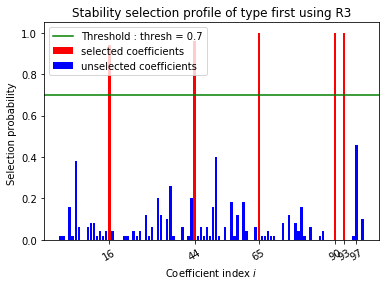

SELECTED VARIABLES : 
16
44
65
90
93


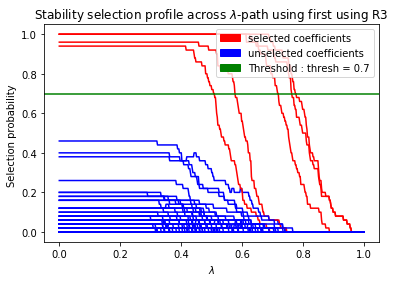

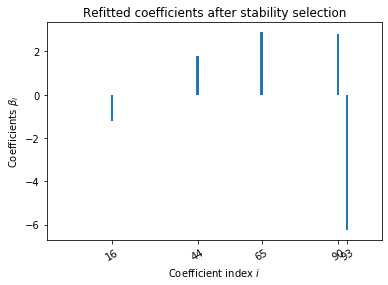

Running time : 
Running time for Path computation    : 'not computed'
Running time for Cross Validation    : 'not computed'
Running time for Stability Selection : 3.585s
Running time for Fixed LAM           : 'not computed'

In [5]:
problem.solution

#### Zarr storage

In [6]:
import zarr
root = zarr.group()
to_zarr(problem,'problem',root)
root.tree()

/
 ├── data
 │   ├── C (1, 100) float64
 │   ├── X (100, 100) float64
 │   ├── label (100,) <U2
 │   └── y (100,) float64
 ├── formulation
 ├── model_selection
 │   ├── CVparameters
 │   │   └── lambdas (500,) float64
 │   ├── LAMfixedparameters
 │   ├── PATHparameters
 │   │   └── lambdas (40,) float64
 │   └── StabSelparameters
 │       └── formulation
 └── solution
     └── StabSel
         ├── distribution (100,) float64
         ├── distribution_path (500, 100) float64
         ├── label (100,) <U2
         ├── lambdas_path (500,) float64
         ├── refit (100,) float64
         ├── selected_param (100,) bool
         └── to_label (100,) bool

#### To plot the solutions, as graphs :

#### To solve a problem different than the default parameters :

In [16]:
m,d,d_nonzero,k,sigma =100,100,5,0,0.5
(X,C,y),sol = random_data(m,d,d_nonzero,k,sigma,zerosum=True,seed=4)
problem                                     = classo_problem(X,y,C)
problem.formulation.huber                   = False
problem.formulation.concomitant             = False

problem.model_selection.CV                  = True
problem.model_selection.LAMfixed            = True
problem.model_selection.PATH                = True
problem.model_selection.StabSel             = True
problem.model_selection.StabSelparameters.method = 'first'
problem.model_selection.CVparameters.seed = 1

In [17]:
problem.solve()

#### To see information about the problem

In [9]:
problem

 
 
FORMULATION: R1
 
MODEL SELECTION COMPUTED:  
     Path
     Cross Validation
     Stability selection
     Lambda fixed
 
CROSS VALIDATION PARAMETERS: 
     Nsubset = 5
     lamin = 0.001
     n_lam = 500
     numerical_method = Path-Alg
 
STABILITY SELECTION PARAMETERS: 
     method = first
     lamin = 0.01
     lam = theoretical
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     numerical_method = Path-Alg
 
LAMBDA FIXED PARAMETERS: 
     lam = theoretical
     theoretical_lam = 19.9396
     numerical_method = Path-Alg
 
PATH PARAMETERS: 
     Npath = 40
     n_active = 0
     lamin = 0.012518750258625292
     numerical_method = Path-Alg

#### To plot the solutions, as graphs :

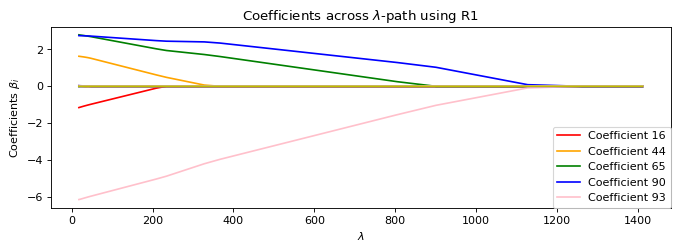

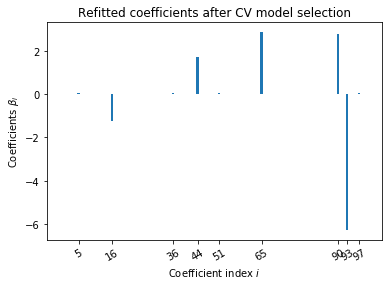

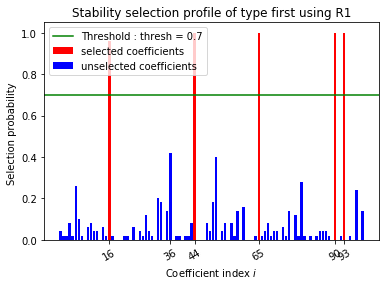

SELECTED VARIABLES : 
16
44
65
90
93


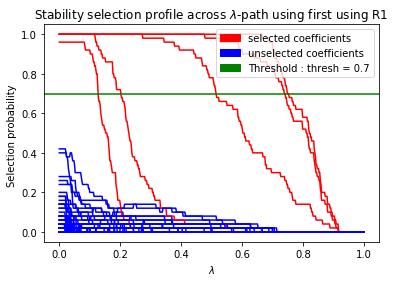

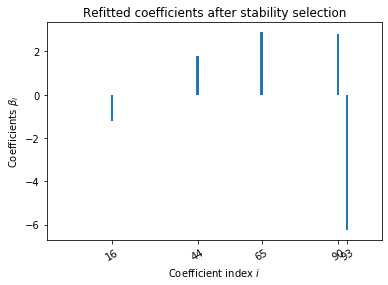

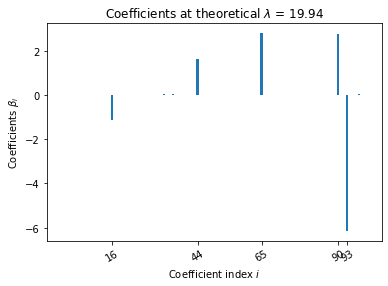

Running time : 
Running time for Path computation    : 0.033s
Running time for Cross Validation    : 0.41s
Running time for Stability Selection : 0.663s
Running time for Fixed LAM           : 0.013s

In [10]:
problem.solution

In [11]:
root = zarr.group()
to_zarr(problem,'problem',root)
root.tree()

/
 ├── data
 │   ├── C (1, 100) float64
 │   ├── X (100, 100) float64
 │   ├── label (100,) <U2
 │   └── y (100,) float64
 ├── formulation
 ├── model_selection
 │   ├── CVparameters
 │   │   ├── formulation
 │   │   └── lambdas (500,) float64
 │   ├── LAMfixedparameters
 │   │   └── formulation
 │   ├── PATHparameters
 │   │   ├── formulation
 │   │   └── lambdas (40,) float64
 │   └── StabSelparameters
 │       └── formulation
 └── solution
     ├── CV
     │   ├── beta (100,) float64
     │   ├── label (100,) <U2
     │   ├── refit (100,) float64
     │   ├── selected_param (100,) bool
     │   ├── standard_error (500,) float64
     │   ├── xGraph (500,) float64
     │   └── yGraph (500,) float64
     ├── LAMfixed
     │   ├── beta (100,) float64
     │   ├── formulation
     │   ├── label (100,) <U2
     │   ├── refit (100,) float64
     │   └── selected_param (100,) bool
     ├── PATH
     │   ├── BETAS (40, 100) float64
     │   ├── LAMBDAS (40,) float64
     │   ├── formulation
     │   └── label (100,) <U2
     └── StabSel
         ├── distribution (100,) float64
         ├── distribution_path (500, 100) float64
         ├── label (100,) <U2
         ├── lambdas_path (500,) float64
         ├── refit (100,) float64
         ├── selected_param (100,) bool
         └── to_label (100,) bool

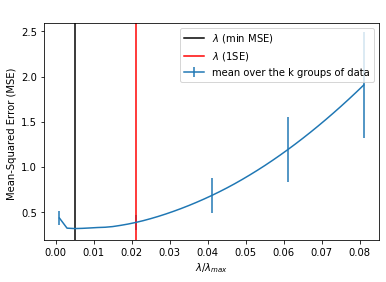

In [12]:
problem.solution.CV.graphic(ratio_mse_max = 1.)

#### To show that the CV (also works for SS) depends only on the seed we choose :

In [13]:
problem = classo_problem(X,y)
MS = problem.model_selection
MS.LAMfixed = False
MS.SS       = False
MS.CV       = True


MS.CVparameters.seed = 1
problem.solve()
solution1 = problem.solution.CV

MS.CVparameters.seed = 1
problem.solve()
solution2 = problem.solution.CV

MS.CVparameters.seed = 3
problem.solve()
solution3 = problem.solution.CV

b1, b2, b3 = solution1.beta, solution2.beta, solution3.beta 

print( "Difference of solution beta for same seed ", np.linalg.norm(b1-b2))

print( "Difference of solution beta for different seeds ", np.linalg.norm(b1-b3))

Difference of solution beta for same seed  0.0
Difference of solution beta for different seeds  0.058592244369075334
